# Linear Regression


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
housing = pd.read_csv('housing.csv')

In [5]:
housing.shape


(20640, 10)

In [6]:
housing.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [7]:
housing.tail(10)



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


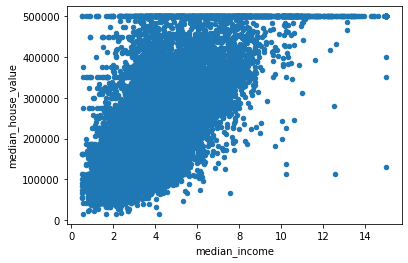

In [8]:
housing.plot.scatter("median_income", "median_house_value")


In [9]:
x_train, x_test, y_train, y_test = train_test_split(housing.median_income, housing.median_house_value, test_size = 0.2)

In [10]:
regr = LinearRegression()


In [11]:
regr.fit(np.array(x_train).reshape(-1,1), y_train)


LinearRegression()

In [12]:
preds = regr.predict(np.array(x_test).reshape(-1,1))


In [13]:
y_test.head()


4954    108800.0
4504    117200.0
6760    306300.0
3345     48100.0
1131    109700.0
Name: median_house_value, dtype: float64

In [14]:
preds

array([115626.38481161, 116476.34340699, 222365.27383638, ...,
       151140.41833878, 266169.54390962, 273375.35052366])

In [15]:
residuals = preds - y_test


(array([1.100e+01, 6.000e+01, 1.430e+02, 4.340e+02, 1.362e+03, 1.932e+03,
        1.790e+02, 4.000e+00, 2.000e+00, 1.000e+00]),
 array([-425515.96079531, -337210.34379294, -248904.72679056,
        -160599.10978819,  -72293.49278582,   16012.12421656,
         104317.74121893,  192623.35822131,  280928.97522368,
         369234.59222605,  457540.20922843]),
 <a list of 10 Patch objects>)

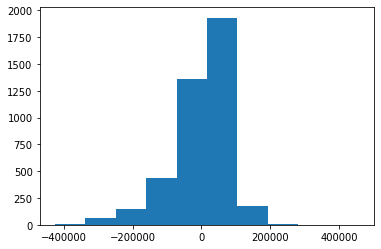

In [16]:
plt.hist(residuals)


In [17]:
mean_squared_error(y_test, preds) ** 0.5


83664.28177323495

Overall, our estimation was as good as we could get it with linear regression. There were many issues; however, that should be considered. First, the data was extremely random, and the correlation was very poor.
Furthermore, we only used linear regression. For a better prediction, we could have used decision trees or random forests. However, this an introduction article, and so I had to keep it basic.

# Forward and Backward Selection


In [18]:
%matplotlib inline
import pandas as pd
import pandas.testing as tm
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as pltm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
housing = pd.read_csv('housing.csv')
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
print("Number of null values:", housing["median_income"].isnull().sum())

Number of null values: 0


In [21]:

print("Dimensions of original data:", housing.shape)
housing_clean   = housing.dropna()

print("Dimensions of modified data:", housing_clean.shape)

print("Number of null values:", housing_clean["median_income"].isnull().sum())

Dimensions of original data: (20640, 10)
Dimensions of modified data: (20433, 10)
Number of null values: 0


In [22]:
housing_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [23]:

y = housing_clean.median_income

X_ = housing_clean.drop(['median_income', 'ocean_proximity'], axis=1).astype('float64')

X = pd.concat([X_], axis=1)

In [24]:
def processSubset(feature_set):
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [25]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    return best_model

In [26]:

models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,7):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 8 models on 1 predictors in 0.09285926818847656 seconds.
Processed 28 models on 2 predictors in 0.2940704822540283 seconds.
Processed 56 models on 3 predictors in 0.6744110584259033 seconds.
Processed 70 models on 4 predictors in 0.9162580966949463 seconds.
Processed 56 models on 5 predictors in 0.8311333656311035 seconds.
Processed 28 models on 6 predictors in 0.4426088333129883 seconds.
Total elapsed time: 3.3096354007720947 seconds.


In [27]:
models_best

,RSS,model
1,50112.639062,<statsmodels.regression.linear_model.Regressio...
2,38803.345618,<statsmodels.regression.linear_model.Regressio...
3,36062.240502,<statsmodels.regression.linear_model.Regressio...
4,26546.965034,<statsmodels.regression.linear_model.Regressio...
5,25254.137161,<statsmodels.regression.linear_model.Regressio...
6,25129.162626,<statsmodels.regression.linear_model.Regressio...


In [28]:
print(models_best.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:          median_income   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                          8.980e+04
Date:                Tue, 23 Nov 2021   Prob (F-statistic):                        0.00
Time:                        22:36:22   Log-Likelihood:                         -35546.
No. Observations:               20433   AIC:                                  7.110e+04
Df Residuals:                   20431   BIC:                                  7.111e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [29]:

print(getBest(1)["model"].summary())

Processed 8 models on 1 predictors in 0.05825185775756836 seconds.
                                 OLS Regression Results                                
Dep. Variable:          median_income   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                          1.345e+05
Date:                Tue, 23 Nov 2021   Prob (F-statistic):                        0.00
Time:                        22:36:22   Log-Likelihood:                         -38159.
No. Observations:               20433   AIC:                                  7.632e+04
Df Residuals:                   20432   BIC:                                  7.633e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t  

In [30]:
models_best.loc[6, "model"].rsquared

0.9338551739157608

In [31]:
models_best.apply(lambda row: row[1].rsquared, axis=1)

1    0.868094
2    0.897862
3    0.905077
4    0.930123
5    0.933526
6    0.933855
dtype: float64

Text(0, 0.5, 'BIC')

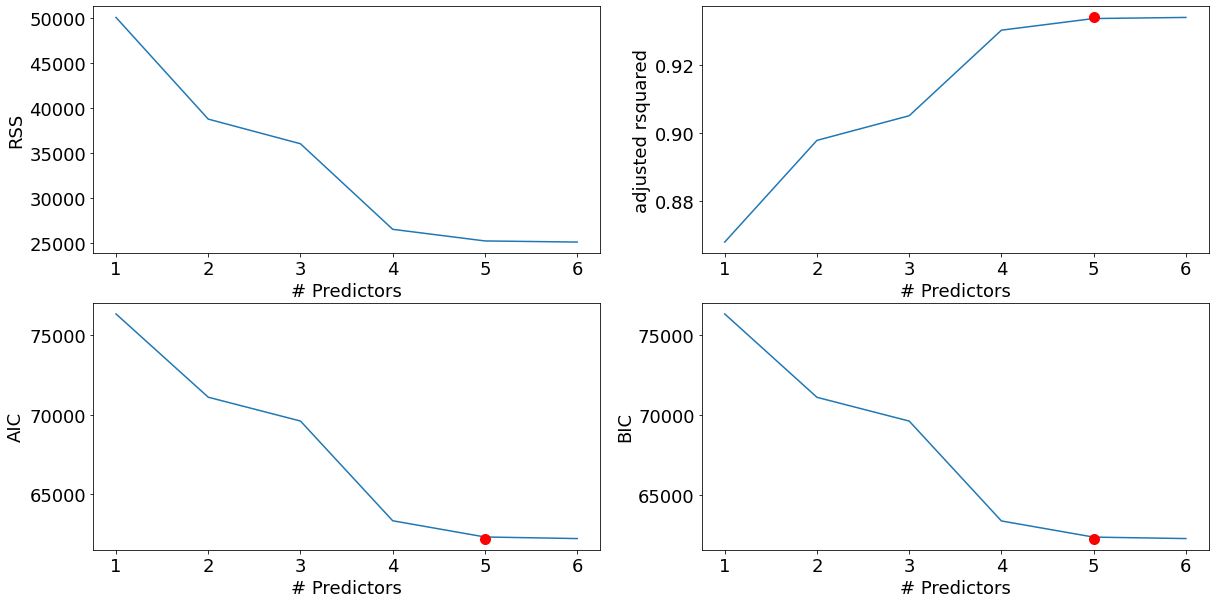

In [32]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

plt.subplot(2, 2, 1)

plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')


rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [33]:
def forward(predictors):

    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    return best_model

In [34]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  8 models on 1 predictors in 0.05927538871765137 seconds.
Processed  7 models on 2 predictors in 0.0638742446899414 seconds.
Processed  6 models on 3 predictors in 0.07250308990478516 seconds.
Processed  5 models on 4 predictors in 0.06728768348693848 seconds.
Processed  4 models on 5 predictors in 0.06270098686218262 seconds.
Processed  3 models on 6 predictors in 0.05214571952819824 seconds.
Processed  2 models on 7 predictors in 0.03896164894104004 seconds.
Processed  1 models on 8 predictors in 0.02285027503967285 seconds.
Total elapsed time: 0.4839794635772705 seconds.


In [35]:
print(models_fwd.loc[1, "model"].summary())
print(models_fwd.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:          median_income   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                          1.345e+05
Date:                Tue, 23 Nov 2021   Prob (F-statistic):                        0.00
Time:                        22:36:24   Log-Likelihood:                         -38159.
No. Observations:               20433   AIC:                                  7.632e+04
Df Residuals:                   20432   BIC:                                  7.633e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [36]:
print(models_best.loc[2, "model"].summary())
print(models_fwd.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:          median_income   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                          8.980e+04
Date:                Tue, 23 Nov 2021   Prob (F-statistic):                        0.00
Time:                        22:36:24   Log-Likelihood:                         -35546.
No. Observations:               20433   AIC:                                  7.110e+04
Df Residuals:                   20431   BIC:                                  7.111e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [37]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        print(combo)
        results.append(processSubset(combo))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    return best_model

In [38]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

('longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households')
('longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'median_house_value')
('longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'households', 'median_house_value')
('longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_house_value')
('longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'population', 'households', 'median_house_value')
('longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value')
('longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value')
('latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value')
Processed  8 models on 7 predictors in 0.17234110832214355 seconds.
('longitude', 

In [39]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[2, "model"].params)

------------
Best Subset:
------------
latitude              0.041891
median_house_value    0.000011
dtype: float64


In [40]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[7, "model"].params)

-----------------
Foward Selection:
-----------------
median_house_value    0.000010
latitude             -0.049399
housing_median_age   -0.022313
total_bedrooms       -0.005305
total_rooms           0.000925
longitude            -0.036561
households            0.000509
dtype: float64


In [41]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[7, "model"].params)

-------------------
Backward Selection:
-------------------
longitude            -0.036561
latitude             -0.049399
housing_median_age   -0.022313
total_rooms           0.000925
total_bedrooms       -0.005305
households            0.000509
median_house_value    0.000010
dtype: float64


# Ridge

In [42]:
%matplotlib inline

import pandas as pd
import pandas.testing as tm
import itertools
import time
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE 
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [43]:
housing = pd.read_csv('housing.csv')
print(housing.head())
housing.info()



   longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0         NEAR BAY
1    -122.22     37.86  ...            358500.0         NEAR BAY
2    -122.24     37.85  ...            352100.0         NEAR BAY
3    -122.25     37.85  ...            341300.0         NEAR BAY
4    -122.25     37.85  ...            342200.0         NEAR BAY

[5 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-nu

In [44]:
alphas = 10**np.linspace(10,-2,100) *0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [45]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

(100, 8)

Text(0, 0.5, 'weights')

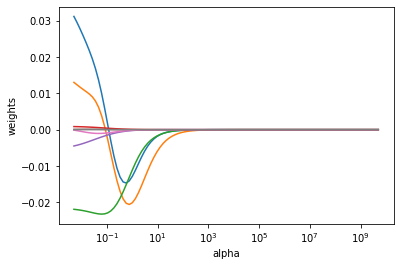

In [46]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [47]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [48]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)             
pred2 = ridge2.predict(X_test)           
print(pd.Series(ridge2.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred2))   

longitude            -0.005940
latitude             -0.009514
housing_median_age   -0.003633
total_rooms           0.000033
total_bedrooms       -0.000040
population           -0.000003
households           -0.000018
median_house_value    0.000002
dtype: float64
3.0569492808950782


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [49]:
ridge3 = Ridge(alpha = 10**10, normalize =True)
ridge3.fit(X_train, y_train)             
pred3 = ridge3.predict(X_test)           
print(pd.Series(ridge3.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred3)) 

longitude            -2.384136e-12
latitude             -5.911419e-12
housing_median_age   -1.722106e-12
total_rooms           1.758269e-14
total_bedrooms        6.855856e-16
population            3.043339e-15
households            1.202990e-14
median_house_value    1.107942e-15
dtype: float64
3.7544929535211287


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [50]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)       
pred = ridge2.predict(X_test)         
print(pd.Series(ridge2.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred)) 

longitude             0.022874
latitude              0.005590
housing_median_age   -0.021330
total_rooms           0.000926
total_bedrooms       -0.005400
population            0.000026
households            0.000535
median_house_value    0.000010
dtype: float64
1.2702535608691656


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [51]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


0.005

In [52]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


1.2737879648446462

In [53]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


longitude             0.031182
latitude              0.013023
housing_median_age   -0.021937
total_rooms           0.000845
total_bedrooms       -0.004495
population            0.000070
households           -0.000130
median_house_value    0.000010
dtype: float64

# Lasso

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

Text(0, 0.5, 'weights')

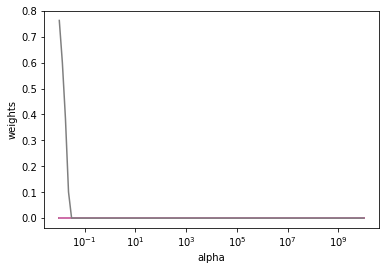

In [54]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [55]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

1.2705569681319482

In [56]:
pd.Series(lasso.coef_, index=X.columns)

longitude             0.015940
latitude             -0.000000
housing_median_age   -0.021279
total_rooms           0.000920
total_bedrooms       -0.005199
population            0.000032
households            0.000334
median_house_value    0.000010
dtype: float64

# Elastic Net

In [73]:

from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

model = ElasticNet(alpha=1.0, l1_ratio=0.5)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 3.682 (0.530)


# PCR

In [58]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

In [59]:

df = pd.read_csv('housing.csv').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [60]:
y = df.median_income

X = pd.concat([X_], axis=1)

In [61]:
pca = PCA() 
X_reduced = pca.fit_transform(scale(X)) 
pd.DataFrame(pca.components_.T) 



,0,1,2,3,4,5,6,7
0,0.076477,-0.698243,-0.127497,0.040004,-0.171441,-0.219122,0.637994,-0.065645
1,-0.074170,0.703775,-0.076660,-0.032699,-0.116932,-0.204386,0.658787,-0.052988
2,-0.215723,0.006198,0.480935,0.842619,-0.069564,-0.080026,0.029577,-0.001577
3,0.483215,0.074830,0.088479,-0.014423,-0.354368,-0.721778,-0.310735,-0.098847
4,0.491649,0.059219,0.040138,0.105843,-0.361030,0.375696,0.108960,0.677199
5,0.472259,0.027662,-0.025118,0.182489,0.822636,-0.168433,0.134614,0.138035
6,0.492789,0.061841,0.060323,0.122449,-0.107883,0.461676,0.069435,-0.710702
7,0.032078,-0.058508,0.856073,-0.477093,0.088368,0.013531,0.163459,0.018959


In [62]:
expLianedVariance=(pca.explained_variance_/pca.explained_variance_.sum())*100
expLianedVarianceCum=expLianedVariance.cumsum()
pd.DataFrame( expLianedVarianceCum, expLianedVariance)

,0
48.804118,48.804118
23.866903,72.671021
13.761590,86.432611
9.899334,96.331946
1.792639,98.124585
1.111223,99.235807
0.569908,99.805715
0.194285,100.000000


In [63]:
expLianedVariance.size


8

(0.0, 20.0)

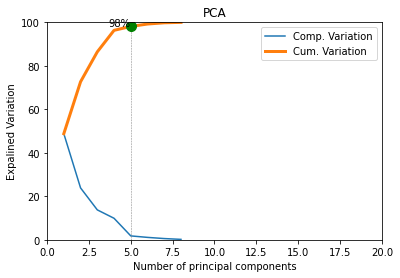

In [64]:
xlabel=range(1, expLianedVariance.size+1)
xlabel=np.reshape( np.asarray(list(xlabel)), (8,))
N_PC_sel=5
variance_N_PC= expLianedVarianceCum[N_PC_sel-1]
plt.figure( )

plt.plot(list(xlabel),expLianedVariance, label='Comp. Variation')
plt.plot(list(xlabel),expLianedVarianceCum, label = 'Cum. Variation', linewidth=3)

plt.axvline(x=N_PC_sel, linestyle='dashed',linewidth=.5, color='grey')

plt.plot(N_PC_sel,variance_N_PC, color='green', marker='o')
plt.text(N_PC_sel,variance_N_PC,"{0:.0%}".format(variance_N_PC/100.0), horizontalalignment='right')

plt.legend()
plt.title('PCA')
plt.xlabel('Number of principal components')
plt.ylabel('Expalined Variation')
plt.ylim([0,100])
plt.xlim([0,20])

In [65]:
pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,0.076477,-0.698243,-0.127497,0.040004,-0.171441,-0.219122
1,-0.074170,0.703775,-0.076660,-0.032699,-0.116932,-0.204386
2,-0.215723,0.006198,0.480935,0.842619,-0.069564,-0.080026
3,0.483215,0.074830,0.088479,-0.014423,-0.354368,-0.721778
4,0.491649,0.059219,0.040138,0.105843,-0.361030,0.375696


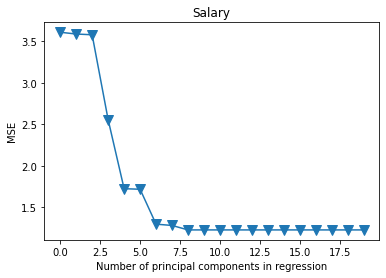

In [66]:

from sklearn.model_selection import KFold
n = len(X_reduced)
kf_10 = KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []


score = -1*cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
  
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

We see that the smallest cross-validation error occurs when $M = .75 components
are used.  However, from the plot we
also see that the cross-validation error is roughly the same when only one
component is included in the model. This suggests that a model that uses
just a small number of components might suffice.

In [67]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([48.8 , 72.67, 86.43, 96.33, 98.12, 99.23, 99.8 , 99.99])

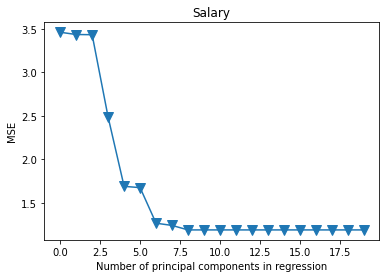

In [68]:
pca2 = PCA()

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

score = -1*cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [69]:
X_reduced_test = pca2.transform(scale(X_test))[:,:7]

regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], y_train)

pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

1.327916415425448

# 6.7.2 Partial Least Squares

Scikit-learn `PLSRegression` gives same results as the `pls` package in R when using `method='oscorespls'`. However, the standard method used is `'kernelpls'`, which we'll use here. Feel free to try out both.

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:236: FutureWarning: As of version 0.24, n_components(9) should be in [1, n_features].n_components=8 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:236: FutureWarning: As of version 0.24, n_components(9) should be in [1, n_features].n_components=8 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:236: FutureWarning: As of version 0.24, n_components(9) should be in [1, n_features].n_components=8 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:236: FutureWarning: As of version 0.24, n_components(9) should be in [1, n_features].n_components=8 wil

(-1.0, 19.9)

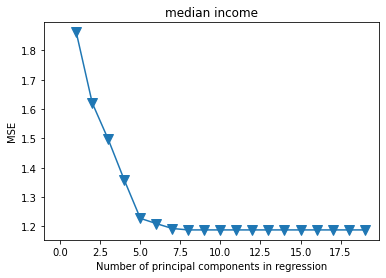

In [70]:
n = len(X_train)

kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('median income')
plt.xlim(xmin=-1)

The lowest cross-validation error occurs when only $M = 1.2$ partial least
squares dimensions are used. We now evaluate the corresponding test set
MSE:

In [71]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

1.6937812234799359

In [72]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
housing = pd.read_csv('housing.csv')
array = housing.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

ValueError: ignored